In [1]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path
get_ipython().run_line_magic('matplotlib', 'inline')
%config InlineBackend.figure_format = 'svg'

In [106]:
path_runcontrol = Path('baserun')/ 'RunControl.nml'
df_state_init = sp.init_supy(path_runcontrol)
grid = df_state_init.index[0]
df_forcing = sp.load_forcing_grid(path_runcontrol, grid)

2020-06-15 15:00:57,378 - SuPy - INFO - All cache cleared.
2020-06-15 15:00:58,979 - SuPy - INFO - All cache cleared.


#### Three scenario utilised
1. Initial conditions used in sample data - Used Suffix: none
2. Building fraction = 0. grass = .41 - Population day/night = 0 - Used Suffix: _r         ("Rural" Conditions)
3. Building fraction = 0.01 grass = .40 - Population day/night = 0 - Used Suffix: _rb      ("Rural"conditons with Building)

In [107]:
df_state_r = df_state_init.copy()
df_state_r.loc[:, ('sfr', '(1,)')] = .00 #Building
df_state_r.loc[:, ('sfr', '(4,)')] = 0.41 #Grass
df_state_r.popdensdaytime = 0
df_state_r.popdensnighttime = 0 
grid_r = df_state_r.index[0]
sp.check_state(df_state_r)

df_state_rb = df_state_init.copy()
df_state_rb.loc[:, ('sfr', '(1,)')] = .01 #Building
df_state_rb.loc[:, ('sfr', '(4,)')] = 0.40 #Grass
df_state_rb.popdensdaytime = 0
df_state_rb.popdensnighttime = 0 
grid_rb = df_state_rb.index[0]
sp.check_state(df_state_rb)

2020-06-15 15:05:38,633 - SuPy - INFO - SuPy is validating `df_state`...
2020-06-15 15:05:38,802 - SuPy - INFO - All checks for `df_state` passed!
2020-06-15 15:05:38,808 - SuPy - INFO - SuPy is validating `df_state`...
2020-06-15 15:05:38,972 - SuPy - INFO - All checks for `df_state` passed!


In [4]:
# Run SuPy initaial conditions
df_output, df_state_final = sp.run_supy(df_forcing, df_state_init);
df_output_suews = df_output['SUEWS']

# Run SuPy with modified environment add _r for recognition later on
df_r_output, df_state_r_final = sp.run_supy(df_forcing, df_state_r);
df_r_output_suews = df_r_output['SUEWS']
df_r_output_suews = df_r_output_suews.add_suffix('_r')

# Run SuPy with modified environment add _rb for recognition later on
df_rb_output, df_state_rb_final = sp.run_supy(df_forcing, df_state_rb);
df_rb_output_suews = df_rb_output['SUEWS']
df_rb_output_suews = df_rb_output_suews.add_suffix('_rb')

2020-06-15 13:18:37,491 - SuPy - INFO - ====================
2020-06-15 13:18:37,492 - SuPy - INFO - Simulation period:
2020-06-15 13:18:37,492 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2020-06-15 13:18:37,493 - SuPy - INFO -   End: 2013-01-01 00:00:00
2020-06-15 13:18:37,494 - SuPy - INFO - 
2020-06-15 13:18:37,495 - SuPy - INFO - No. of grids: 1
2020-06-15 13:18:37,496 - SuPy - INFO - SuPy is running in serial mode
2020-06-15 13:19:36,790 - SuPy - INFO - Execution time: 59.3 s
2020-06-15 13:19:36,791 - SuPy - INFO - ====================

2020-06-15 13:19:36,793 - SuPy - INFO - ====================
2020-06-15 13:19:36,794 - SuPy - INFO - Simulation period:
2020-06-15 13:19:36,795 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2020-06-15 13:19:36,795 - SuPy - INFO -   End: 2013-01-01 00:00:00
2020-06-15 13:19:36,796 - SuPy - INFO - 
2020-06-15 13:19:36,796 - SuPy - INFO - No. of grids: 1
2020-06-15 13:19:36,797 - SuPy - INFO - SuPy is running in serial mode
2020-06-15 13:21:26,416 - S

In [53]:
df_output_solweig = df_output['SOLWEIG']
df_output_solweig_g = df_output_solweig.loc[grid]
df_merge_s = pd.concat([df_output_solweig_g],axis=1,join='inner')
df_output_rsl = df_output['RSL']
df_output_rsl = df_output_rsl.loc[grid]

In [108]:
# Merge to one dataframe for easier plotting
grid_r = df_state_r.index[0];
df_output_suews_g = df_output_suews.loc[grid];
df_r_output_suews_g = df_r_output_suews.loc[grid_r];
df_rb_output_suews_g = df_rb_output_suews.loc[grid_rb];
df_merge = pd.concat([df_output_suews_g, df_r_output_suews_g,df_rb_output_suews_g],axis=1,join='inner');

### information regarding initial conditions

##### Radiation fluxes 22 July - 24 July 2012

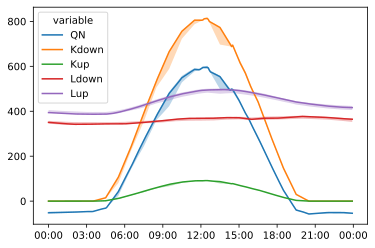

In [115]:
s = '2012 7 22';
e = '2012 7 24' ;  
sp.util.plot_day_clm(df_merge.loc[s:e,['QN', 'Kdown', 'Kup', 'Ldown', 'Lup']]);

##### Sunrise and Sundown
SOLWEIG variables

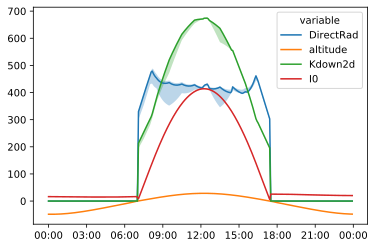

In [123]:
sp.util.plot_day_clm(df_merge_s.loc[s:e,['DirectRad','altitude','Kdown2d','I0']]);

##### Wind

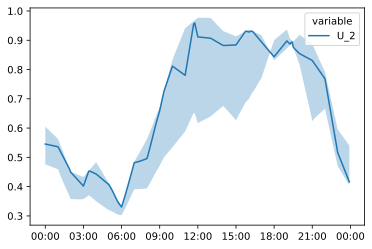

In [124]:
sp.util.plot_day_clm(df_output_rsl.loc[s:e,['U_2']]);

# Investigation of Output Variables

##### Temperature 2 magl

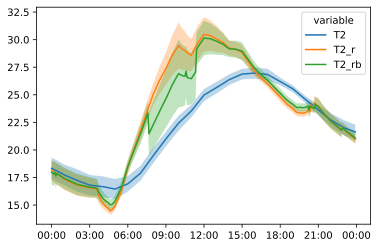

In [101]:
sp.util.plot_day_clm(df_merge.loc[s:e,['T2', 'T2_r', 'T2_rb']]);

##### Relative Humidity (%)

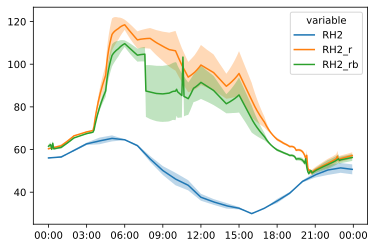

In [102]:
sp.util.plot_day_clm(df_merge.loc[s:e,['RH2', 'RH2_r', 'RH2_rb']]);

##### Specific Humidity (g/kg^-1)

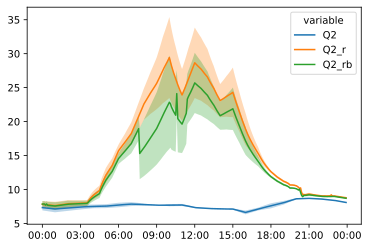

In [103]:
sp.util.plot_day_clm(df_merge.loc[s:e,['Q2', 'Q2_r', 'Q2_rb']]);

##### Friction Velocity

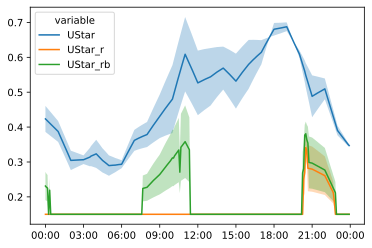

In [104]:
sp.util.plot_day_clm(df_merge.loc[s:e,['UStar', 'UStar_r', 'UStar_rb']]);

##### Resistance

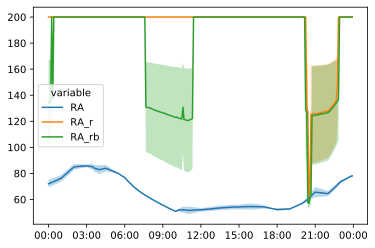

In [105]:
sp.util.plot_day_clm(df_merge.loc[s:e,['RA', 'RA_r', 'RA_rb']]);